In [1]:
# Importing relevant libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the diabetes dataset as a pandas dataframe
df = pd.read_csv('diabetes_binary_dataset.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
# Checking for any null/missing values
pd.isna(df).sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# Checking information, such as total number of entries and datatype of every feature and target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
# Printing max and min to find BMI range
print(df['BMI'].max())
print(df['BMI'].min())

98.0
12.0


## CITE THE FOLLOWING CODE FROM THE GROUP PROJECT

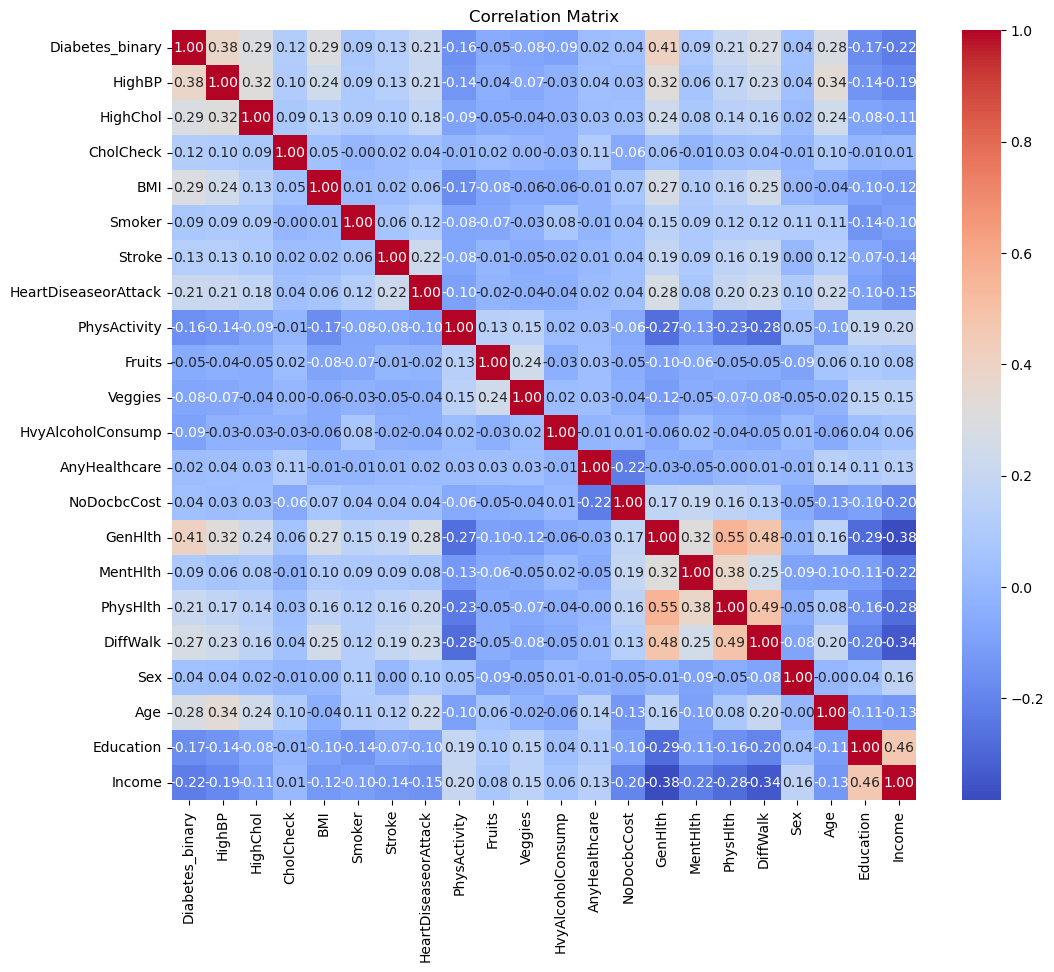

In [12]:
# Correlation matrix for numerical features [1]
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Training and testing baseline model only with 10% of the dataset.

In [15]:
# Importing all relevant functions and libraries to run a Multilayer Perceptron model
import torch   # PyTorch library, useful to execute tensor operations
import torch.nn as nn   # nn = Neural Network, used for building layers and models
import torch.nn.functional as F   # Provides functions like activation function or loss computations
from skorch import NeuralNetClassifier   # Wrapper that makes PyTorch models compatible with scikit-learn tools (e.g. GridSearchCV)
from sklearn.model_selection import train_test_split   # Used for splitting the data between train and test
from sklearn.preprocessing import StandardScaler   # Used for feature standardization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # Evaluation metrics
import time   # Importing time to calculate how long it takes to train the model

X = df.drop(columns='Diabetes_binary').values.astype(np.float32)   # Extracting all features and converting to float32 type
y = df['Diabetes_binary'].values.astype(np.int64)   # Extracting target variable and converting to int64 type

# Taking a 10% subset of the whole datset to train baseline model and subsequently perform a grid search for hyper-parameter tuning,
# due to the whole dataset taking too long
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# Splitting between training and testing on 10% subset
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small, random_state=42)

# Converting labels to float32 type for Binary Classification Loss (BCELoss) function
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the baseline MLP model
class MLPModule(nn.Module):
    def __init__(self, input_dim, hidden_dim=15):   # For baseline, only 15 hidden neurons are implemented 
        super(MLPModule, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)   # Input layer --> Hidden layer
        self.output = nn.Linear(hidden_dim, 1)           # Hidden layer --> Output layer

    def forward(self, X):
        X = F.relu(self.hidden(X))   # ReLU activation function is applied to the output of the hidden layer
        X = torch.sigmoid(self.output(X))   # Sigmoid function is applied to the output of the output layer
        return X.view(-1)   # Reshaping output tensor as the BCELoss function expects a 1D vector

# Wrapping the model with skorch's NeuralNetClassifier
baseline = NeuralNetClassifier(   # For baseline model no momentum and regularization is used
    MLPModule,
    module__input_dim=X_train.shape[1],   # Setting the input dimension equal to the no. of features in the dataset
    module__hidden_dim=15,   # Only 15 hidden neurons for baseline are used
    max_epochs=50,   # A maximum of 50 epochs are run - baseline is used purely to understand how the model behaves,
                     # so no need to run many epochs
    lr=0.001,   # Learning rate set to 0.001
    optimizer=torch.optim.SGD,   # Standard Gradient Descent (SGD) is used as optimizer
    criterion=nn.BCELoss,   # BCELoss function is implemented as output of target is binary (0 or 1)
    iterator_train__shuffle=True,   # Ensures training data is shuffled before every epoch, avoiding the model to learn unintended patterns
    verbose=1,   # Outputs basic training progress
    device='cpu')   # Training model on CPU

# Training the model
start_time = time.time()   # Starting timer
baseline.fit(X_train_scaled, y_train)   # Performing the actual training of the model
end_time = time.time()   # Ending timer

# Predicting on the scaled test set
y_pred = baseline.predict(X_test_scaled)

# Evaluating the performance of the baseline model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing results
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7040       0.4943        0.7044  0.0501
      2        0.7024       0.5022        0.7029  0.0236
      3        0.7009       0.5049        0.7014  0.0288
      4        0.6995       0.5075        0.6999  0.0276
      5        0.6980       0.5119        0.6985  0.0253
      6        0.6966       0.5146        0.6971  0.0253
      7        0.6953       0.5243        0.6958  0.0250
      8        0.6939       0.5314        0.6944  0.0255
      9        0.6926       0.5358        0.6931  0.0262
     10        0.6913       0.5393        0.6919  0.0254
     11        0.6900       0.5447        0.6906  0.0245
     12        0.6888       0.5508        0.6894  0.0250
     13        0.6876       0.5526        0.6882  0.0251
     14        0.6864       0.5500        0.6870  0.0258
     15        0.6852       0.5570        0.6859  0.0259
     16        0.6840       0.5

Running a grid search (always on 10% of the dataset) on hyper-parameters with 3-fold cross-validation and further upgrading the baseline model by adding weight decay and momentum.

In [ ]:
# Importing GridSearchCV function used to run grid search and find optimal hyper-parameters
from sklearn.model_selection import GridSearchCV

# param_grid is going to be plugged in the GridSearchCV function which will span all possible combinations
param_grid = { 
    'lr': [0.001, 0.01, 0.1],   # Learning rate
    'max_epochs': [250, 500],   # Maximum number of epochs
    'module__hidden_dim': [15, 30, 45],   # Number of hidden neurons
    'optimizer': [torch.optim.SGD],   # Standard Gradient Descent Optimiser
    'optimizer__weight_decay': [0,1e-3,1e-2],   # Weight decay regularisation
    'optimizer__momentum': [0.0, 0.9]   # Momentum
}

# Applying grid search on the baseline model, using a 3-fold cross-validation and above chosen hyper-parameter (H-P) values
grid = GridSearchCV(baseline, param_grid, cv=3, verbose=1, n_jobs=1)
grid.fit(X_train_scaled, y_train)   # Fitting the grid search to test on all possible combinations and performing a 3-fold cross-validation
                                    # to evaluate each configuration

In [ ]:
# Printing best set of H-P values
print("Best parameters:", grid.best_params_)

# Use the best model from grid search
best_model = grid.best_estimator_

# Predicting labels on the test set after finding the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

After finding optimal hyper-parameters, run the MLP model using the selected values on the whole dataset (not just 10%).

In [17]:
# Performing the same staps as done for the baseline model, except adding momentum and weight decay
# as well as plugging in optimal hyper-parameter values

X = df.drop(columns='Diabetes_binary').values.astype(np.float32)   # Extracting all features and converting to float32 type
y = df['Diabetes_binary'].values.astype(np.int64)   # Extracting target variable and converting to int64 type

# Splitting between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Converting labels to float32 type for BCELoss function
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model with optimal hyper-parameters
class MLPModule(nn.Module):
    def __init__(self, input_dim, hidden_dim = 30):   # 30 hidden neurons are implemented
        super(MLPModule, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)   # Input layer --> Hidden layer
        self.output = nn.Linear(hidden_dim, 1)           # Hidden layer --> Output layer

    def forward(self, X):
        X = F.relu(self.hidden(X))   # ReLU activation function is applied to the output of the hidden layer
        X = torch.sigmoid(self.output(X))   # Sigmoid function is applied to the output of the output layer
        return X.view(-1)   # Reshaping output tensor as the BCELoss function expects a 1D vector

# Wrapping the model with skorch's NeuralNetClassifier
net = NeuralNetClassifier(   # Only regularisation is now used on net model
    MLPModule,
    module__input_dim = X_train.shape[1],   # Setting the input dimension equal to the no. of features in the dataset
    module__hidden_dim = 30,   # 30 hidden neurons are implemented
    max_epochs = 500,   # A maximum of 500 epochs are run
    lr = 0.01,   # Learning rate set to 0.01
    optimizer = torch.optim.SGD,   # Standard Gradient Descent (SGD) is used as optimizer
    optimizer__weight_decay = 0.001,   # Weight decay set to 0.001
    optimizer__momentum = 0,   # Momentum set to 0
    criterion = nn.BCELoss,   # BCELoss function is implemented as target output is binary (0 or 1)
    iterator_train__shuffle = True,   # Ensures training data is shuffled before every epoch, avoiding the model to learn unintended patterns
    verbose=1,   # Outputs basic training progress
    device='cpu')   # Training model on CPU

# Training the model
start_time = time.time()   # Starting timer
net.fit(X_train_scaled, y_train)   # Performing the actual training of the model
end_time = time.time()   # Ending timer

# Predicting on the scaled test set
y_pred = net.predict(X_test_scaled)

# Evaluating the performance of the net model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing results
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6207       0.7327        0.5700  0.2813
      2        0.5474       0.7410        0.5317  0.2366
      3        0.5256       0.7447        0.5193  0.2755
      4        0.5179       0.7463        0.5142  0.2468
      5        0.5144       0.7473        0.5116  0.2472
      6        0.5126       0.7487        0.5101  0.2732
      7        0.5114       0.7479        0.5092  0.2597
      8        0.5106       0.7485        0.5085  0.2385
      9        0.5101       0.7490        0.5081  0.2460
     10        0.5096       0.7493        0.5077  0.2592
     11        0.5092       0.7502        0.5075  0.2445
     12        0.5088       0.7488        0.5071  0.2559
     13        0.5086       0.7505        0.5070  0.2560
     14        0.5083       0.7504        0.5067  0.2951
     15        0.5080       0.7510        0.5066  0.2315
     16        0.5078       0.7

In [19]:
# Saving the best model
import joblib

joblib.dump(net, 'mlp_best_model.pkl')

['mlp_best_model.pkl']

In [27]:
# Saving test data
# Get the original feature names (excluding the target column)
feature_names = df.drop('Diabetes_binary', axis=1).columns

# Create DataFrame from the scaled test data
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Add the target column back
X_test_df['Diabetes_binary'] = y_test

# Save to CSV
X_test_df.to_csv("test_set.csv", index=False)

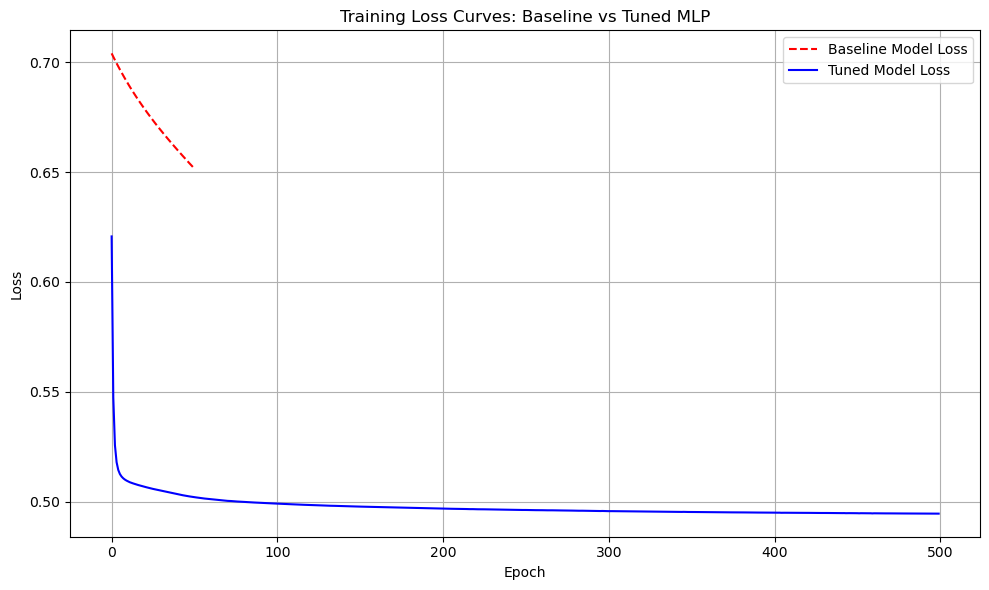

In [35]:
# Extract training loss from baseline model
baseline_loss = [epoch['train_loss'] for epoch in baseline.history]

# Extract training loss from optimized model
tuned_loss = [epoch['train_loss'] for epoch in net.history]

# Plot training loss curve
plt.figure(figsize=(10, 6))
plt.plot(baseline_loss, label='Baseline Model Loss', color='red', linestyle='--')
plt.plot(tuned_loss, label='Tuned Model Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves: Baseline vs Tuned MLP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gauge model efficiency by plotting the area under ROC curve and the confusion matrix.

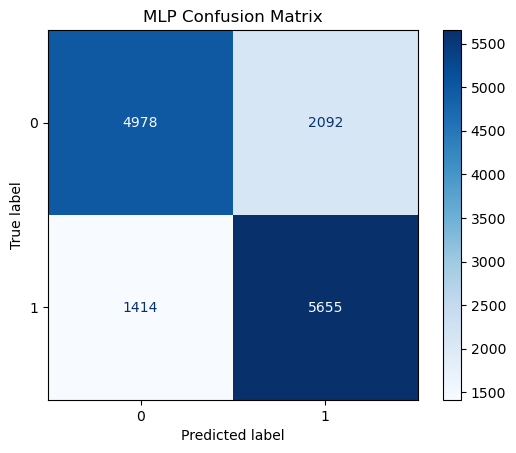

In [29]:
# Importing functions to plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plotting confusion matrix on true vs predicted values
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.show()

/var/folders/k7/3ph50_zd6wn9fdg37q55y20r0000gn/T/ipykernel_36964/758098767.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line


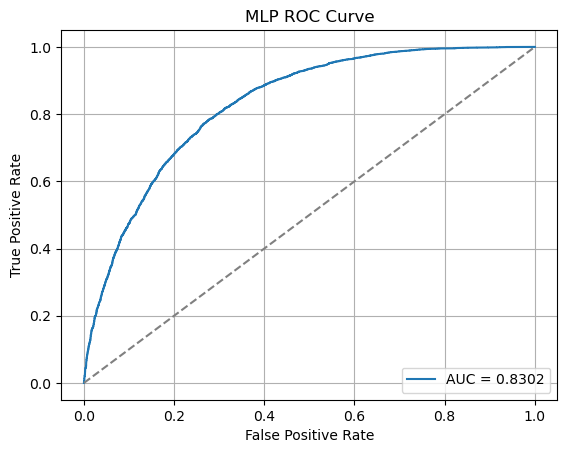

In [31]:
# Importing functions to plot and evaluate the area under the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Getting probabilities for class 1
y_proba = net.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting the curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## ADDITIONAL MATERIAL

In [60]:
class MLPModuleV2(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(MLPModuleV2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.output = nn.Linear(hidden_dim2, 1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = torch.sigmoid(self.output(X))
        return X.view(-1)

net_v2 = NeuralNetClassifier(
    MLPModuleV2,
    module__input_dim=X_train.shape[1],
    max_epochs=50,
    optimizer=torch.optim.SGD,
    criterion=nn.BCELoss,
    verbose=1,
    device='cpu')

param_grid_v2 = {
    'module__hidden_dim1': [40,32],
    'module__hidden_dim2': [32,24],
    'lr': [0.1,0.01,0.001],
    'optimizer__momentum': [0,0.9],
    'optimizer__weight_decay': [0,1e-4,1e-3]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

X_sub, _, y_sub, _ = train_test_split(X_train_scaled, y_train, test_size=0.9, stratify=y_train, random_state=42)

grid_v2 = GridSearchCV(net_v2, param_grid_v2, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_v2.fit(X_sub, y_sub)

print("Best parameters:", grid_v2.best_params_)
print("Best F1 score  :", grid_v2.best_score_)

## REFERENCES

[1] N. Finzi & S. Elangovan, *"Code File"* in *"Comparison between MATLAB and Python MLP Implementation"*, Unpublished manuscript, Neural Computing, City St. George's University, 2025.